# Домашна задача 2 - Дел 1
## Виртуелни општества 2018/2019
### Андреј Јанчевски - 151003

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pandas
from collections import OrderedDict

### Читање на податоците

In [2]:
fifa2006 = pandas.read_csv(
    "./FIFA CSV/2006_FIFA_1M.csv", encoding="utf-8", index_col=0)
nrows2006, ncols2006 = fifa2006.shape
fifa2015 = pandas.read_csv(
    "./FIFA CSV/2015_FIFA_1M.csv", encoding="utf-8", index_col=0)
nrows2015, ncols2015 = fifa2015.shape

### Креирање на графовите

In [3]:
people2006 = fifa2006.columns
fifa2006_graph = nx.Graph()
edge_threshold = 0
for i in range(0, nrows2006):
    person = people2006[i]
    for j in range(i + 1, ncols2006):
        person2 = people2006[j]
        interactions = fifa2006[person][person2]
        if interactions > edge_threshold:
            fifa2006_graph.add_edge(person, person2, weight=interactions)

for person in people2006:
    fifa2006_graph.add_node(person)

In [4]:
people2015 = fifa2015.columns
fifa2015_graph = nx.Graph()
edge_threshold = 0
for i in range(0, nrows2015):
    person = people2015[i]
    for j in range(i + 1, ncols2015):
        person2 = people2015[j]
        interactions = fifa2015[person][person2]
        if interactions > edge_threshold:
            fifa2015_graph.add_edge(person, person2, weight=interactions)

for person in people2015:
    fifa2015_graph.add_node(person)

### Визуелизација на графовите

In [5]:
node_positions = nx.drawing.layout.spring_layout(
    fifa2006_graph, seed=57, iterations=1000, k=10)
edge_weights = list(nx.get_edge_attributes(fifa2006_graph, "weight").values())
node_cmap = edge_cmap = plt.get_cmap("cool")
edge_colors = edge_weights
min_edge_weight = min(edge_weights)
max_edge_weight = max(edge_weights)
edge_widths = [
    4.5 * (weight - min_edge_weight) / (max_edge_weight - min_edge_weight) +
    0.5 for weight in edge_weights
]

C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


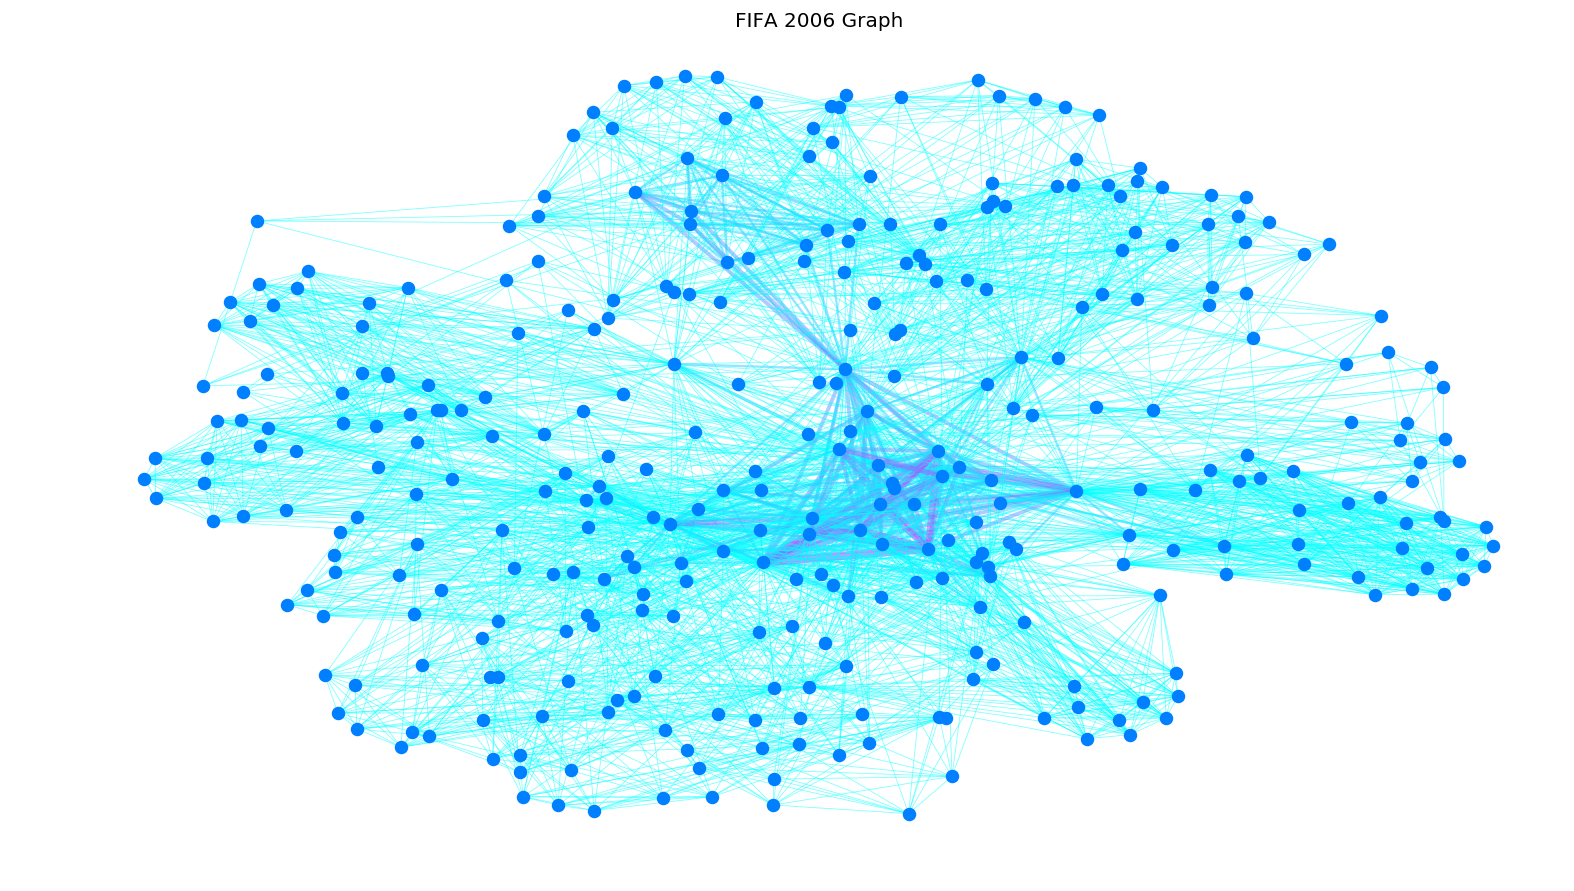

In [6]:
plt.figure(1, (16, 9), dpi=int(1920 / 16))
nx.draw_networkx_nodes(
    fifa2006_graph,
    pos=node_positions,
    node_size=50,
    node_color=((0, 0.5, 1, 1), ),
    cmap=node_cmap)
nx.draw_networkx_edges(
    fifa2006_graph,
    pos=node_positions,
    width=edge_widths,
    edge_color=edge_colors,
    alpha=0.5,
    edge_cmap=edge_cmap)
plt.title("FIFA 2006 Graph", fontsize=12)
plt.axis('off')
plt.show()

In [80]:
node_positions = nx.drawing.layout.spring_layout(
    fifa2015_graph, seed=57, iterations=1000, k=10)
edge_weights = list(nx.get_edge_attributes(fifa2015_graph, "weight").values())
node_cmap = edge_cmap = plt.get_cmap("cool")
edge_colors = edge_weights
min_edge_weight = min(edge_weights)
max_edge_weight = max(edge_weights)
edge_widths = [
    4.5 * (weight - min_edge_weight) / (max_edge_weight - min_edge_weight) +
    0.5 for weight in edge_weights
]

C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


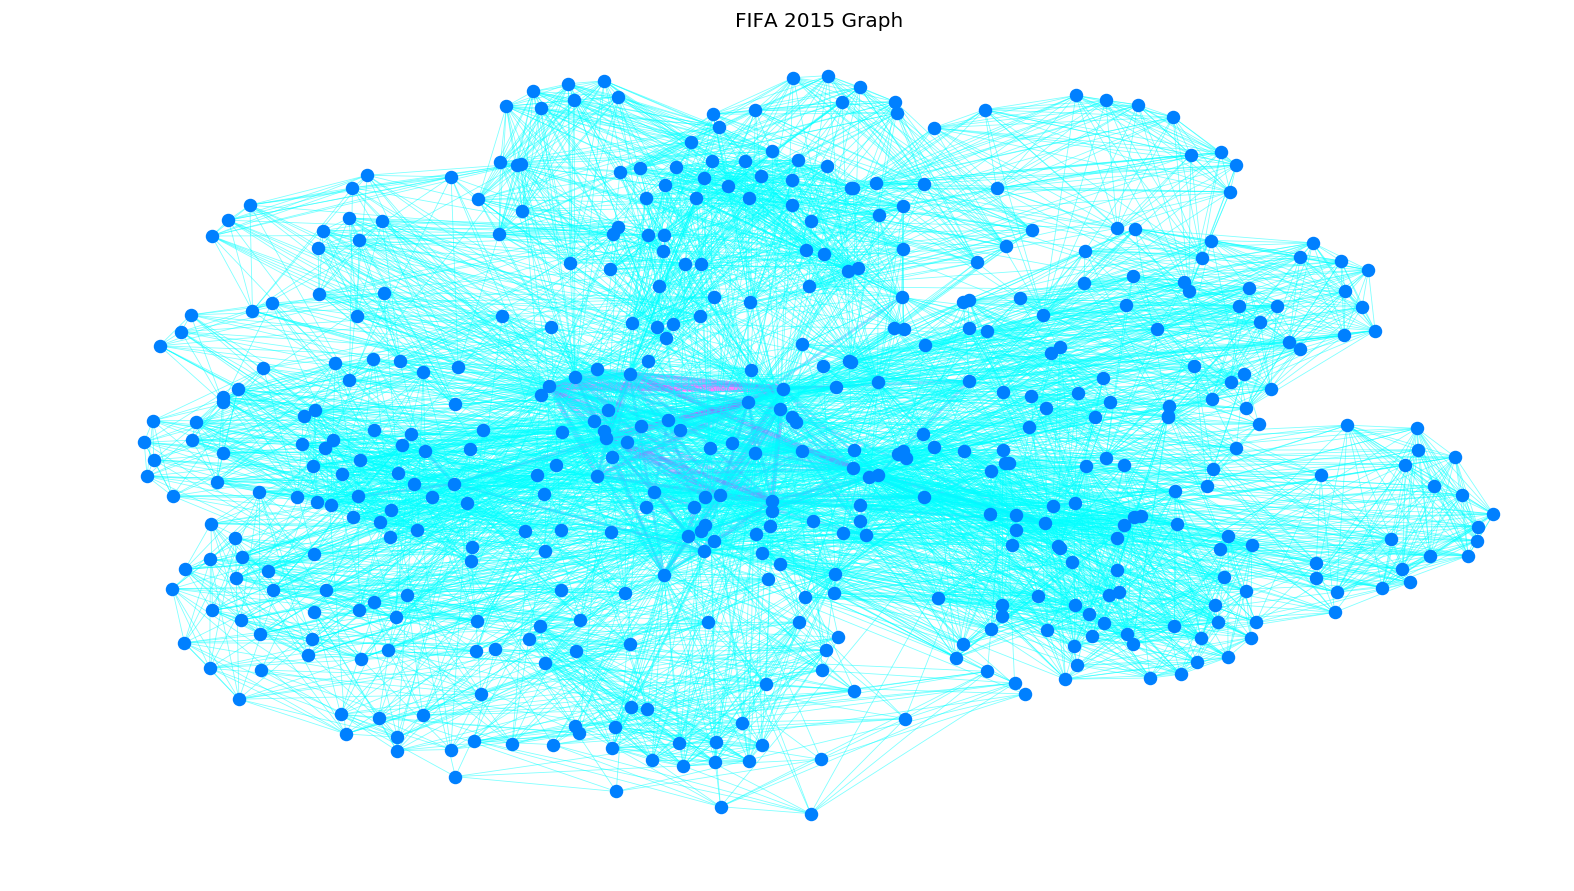

In [81]:
plt.figure(1, (16, 9), dpi=int(1920 / 16))
nx.draw_networkx_nodes(
    fifa2015_graph,
    pos=node_positions,
    node_size=50,
    node_color=((0, 0.5, 1, 1), ),
    cmap=node_cmap)
nx.draw_networkx_edges(
    fifa2015_graph,
    pos=node_positions,
    width=edge_widths,
    edge_color=edge_colors,
    alpha=0.5,
    edge_cmap=edge_cmap)
plt.title("FIFA 2015 Graph", fontsize=12)
plt.axis('off')
plt.show()

### Hubs

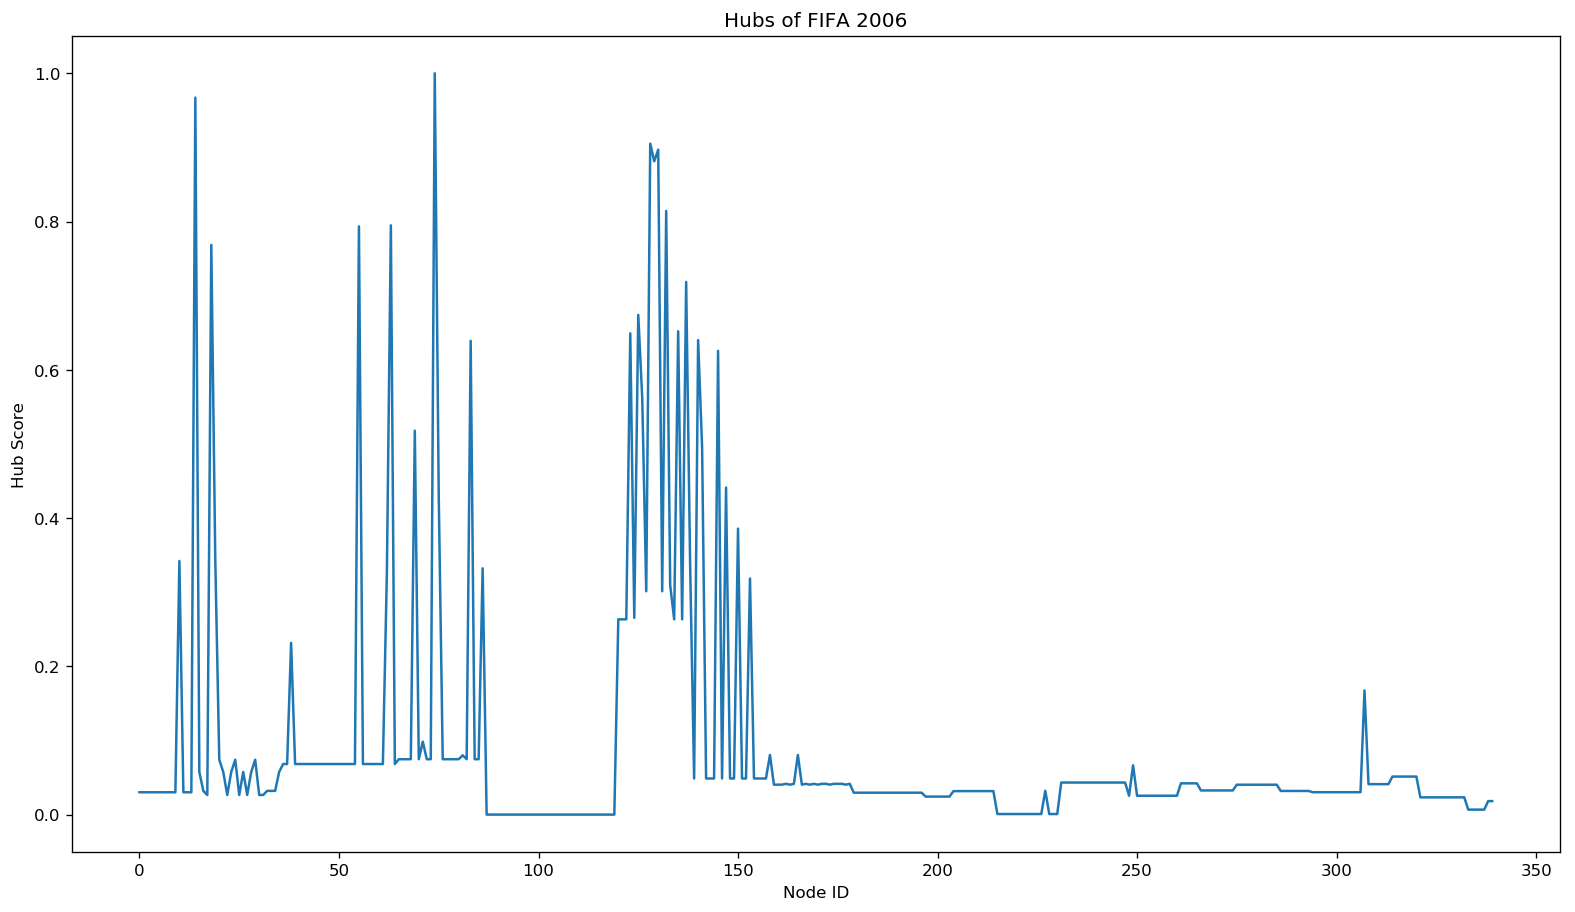

['Hayatou Issa',
 'Warner Jack A',
 'Grandona Julio Ricardo',
 'Leoz Nicolas Dr',
 'Johansson Lennart',
 'Mayer-Vorfelder Gerhard',
 'Villar Llona Angel Maria',
 'Platini Michel',
 'D Hooghe Michel',
 'Will David H']

In [20]:
hubs2006, authorities2006 = nx.hits(fifa2006_graph, normalized=False)
plt.figure(2, figsize=(16, 9), dpi=1920 / 16)
plt.title("Hubs of FIFA 2006")
plt.plot(hubs2006.values())
plt.xlabel("Node ID")
plt.ylabel("Hub Score")
plt.show()
hubs2006 = OrderedDict(hubs2006)
top_hubs2006 = list(
    OrderedDict(sorted(hubs2006.items(), key=lambda x: x[1],
                       reverse=True)).keys())[0:10]
top_hubs2006

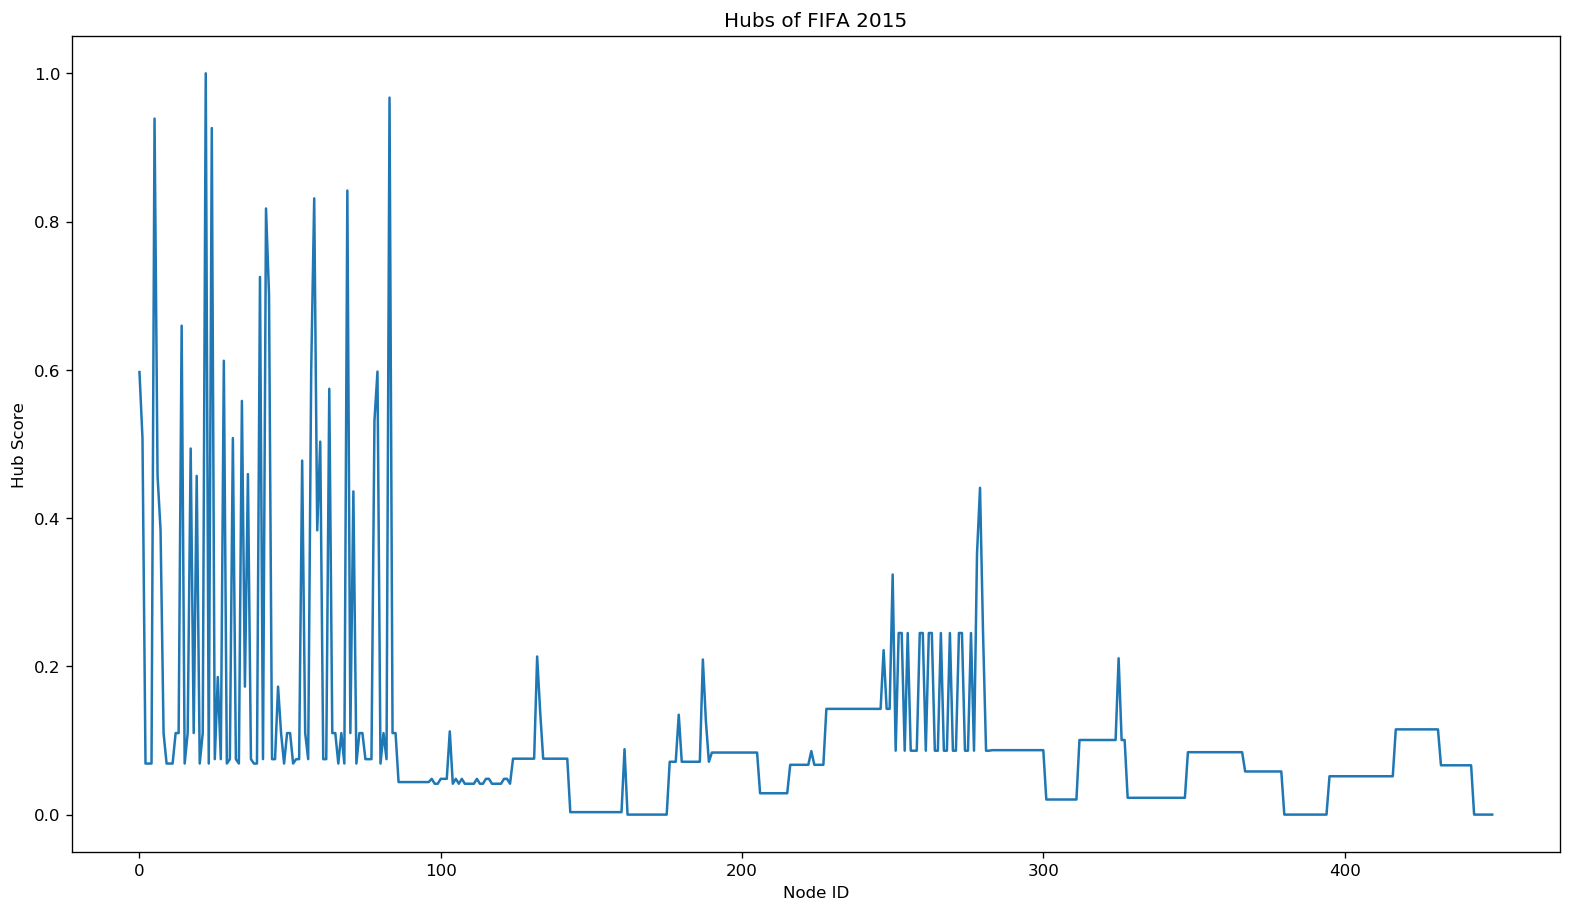

['CHUNG David',
 'VILLAR LLONA Angel Maria',
 'AL KHALIFA Shk. Salman Bin Ebrahim',
 'D HOOGHE Michel',
 'PLATINI Michel',
 'NAPOUT Juan Angel',
 'HAWIT BANEGAS Alfredo',
 'GULATI Sunil',
 'HAYATOU Issa',
 'BEDOYA Luis']

In [21]:
hubs2015, authorities2015 = nx.hits(fifa2015_graph, normalized=False)
plt.figure(3, figsize=(16, 9), dpi=1920 / 16)
plt.title("Hubs of FIFA 2015")
plt.plot(hubs2015.values())
plt.xlabel("Node ID")
plt.ylabel("Hub Score")
plt.show()
hubs = OrderedDict(hubs2015)
top_hubs2015 = list(
    OrderedDict(sorted(hubs2015.items(), key=lambda x: x[1],
                       reverse=True)).keys())[0:10]
top_hubs2015

### Clustering Coefficients

In [33]:
clustering_coefficients2006 = nx.clustering(fifa2006_graph)
np.median(list(clustering_coefficients_2006.values()))

1.0

In [34]:
clustering_coefficients2015 = nx.clustering(fifa2015_graph)
np.median(list(clustering_coefficients_2015.values()))

1.0

### Centralities

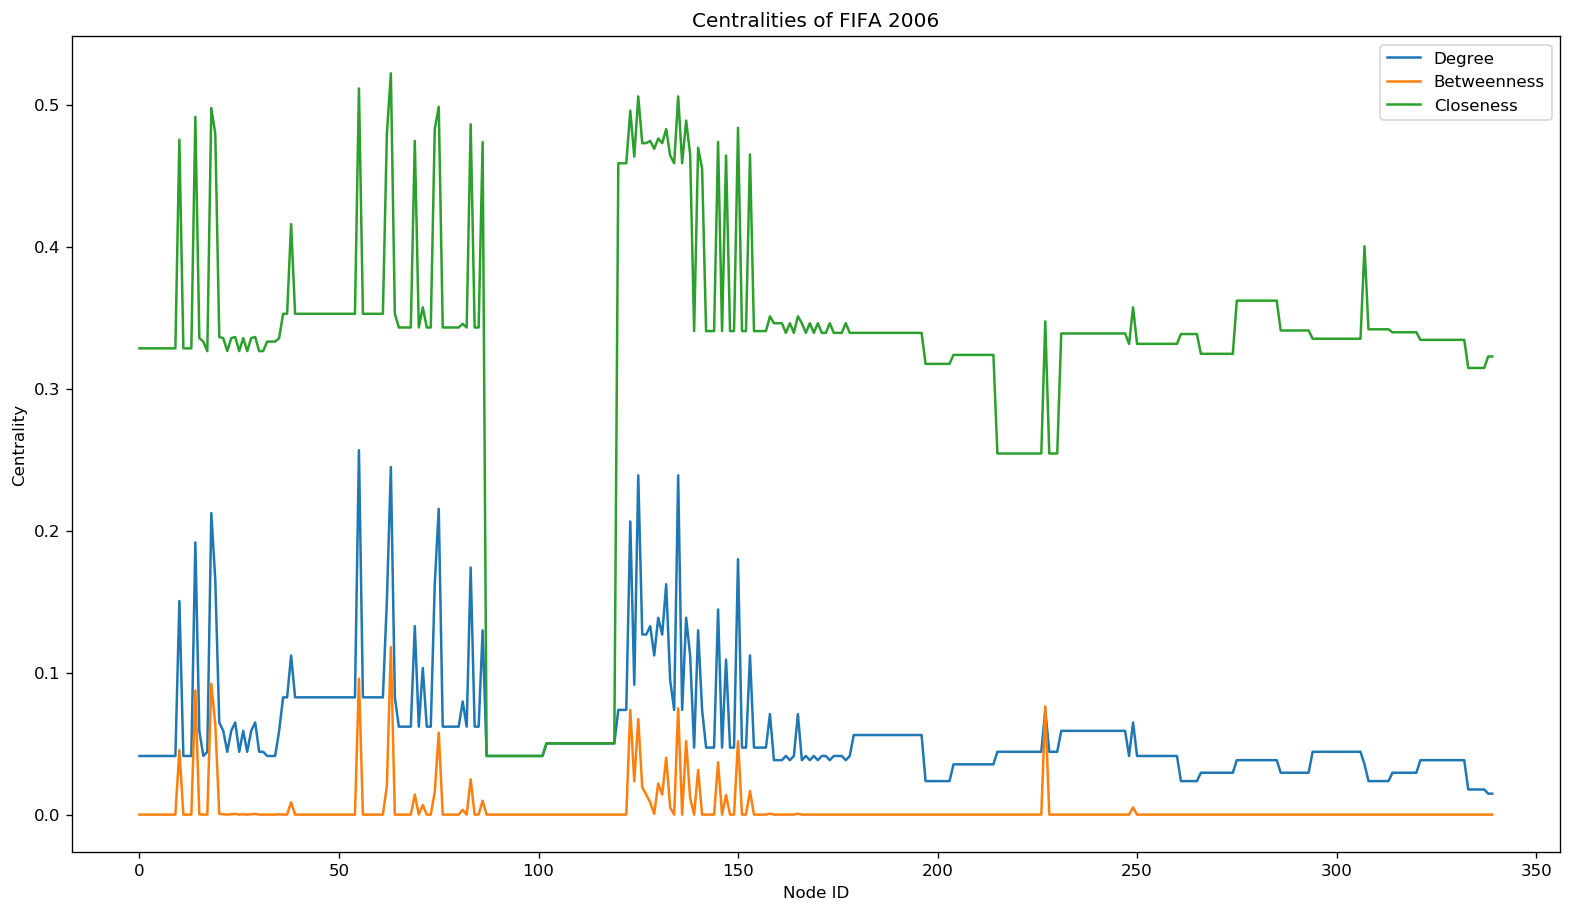

In [24]:
degree_centralities2006 = OrderedDict(nx.degree_centrality(fifa2006_graph))
betweenness_centralities2006 = OrderedDict(
    nx.betweenness_centrality(fifa2006_graph))
closeness_centralities2006 = OrderedDict(nx.closeness_centrality(fifa2006_graph))
plt.figure(3, figsize=(16, 9), dpi=1920 / 16)
plt.title("Centralities of FIFA 2006")
lines = plt.plot(
    range(0, nrows2006), degree_centralities2006.values(), range(0, nrows2006),
    betweenness_centralities2006.values(), range(0, nrows2006),
    closeness_centralities2006.values())
plt.xlabel("Node ID")
plt.ylabel("Centrality")
plt.legend(lines, ("Degree", "Betweenness", "Closeness"), loc="best")
plt.show()

In [25]:
central = list(
    OrderedDict(
        sorted(
            degree_centralities2006.items(), key=lambda x: x[1],
            reverse=True)).keys())
central[0:10]

['Platini Michel',
 'Villar Llona Angel Maria',
 'Chiboub Slim',
 'Teixeira Ricardo Terra',
 'Koloskov Viacheslav',
 'D Hooghe Michel',
 'Blazer Chuck',
 'Warner Jack A',
 'Makudi Worawi',
 'Temarii Reynald']

In [15]:
central = list(
    OrderedDict(
        sorted(
            betweenness_centralities2006.items(),
            key=lambda x: x[1],
            reverse=True)).keys())
central[0:10]

['Villar Llona Angel Maria',
 'Platini Michel',
 'D Hooghe Michel',
 'Warner Jack A',
 'Sahu Khan Muhammad Dr',
 'Teixeira Ricardo Terra',
 'Blazer Chuck',
 'Chiboub Slim',
 'Diakite Amadou',
 'Koloskov Viacheslav']

In [27]:
central = list(
    OrderedDict(
        sorted(
            closeness_centralities2006.items(),
            key=lambda x: x[1],
            reverse=True)).keys())
central[0:10]

['Villar Llona Angel Maria',
 'Platini Michel',
 'Chiboub Slim',
 'Teixeira Ricardo Terra',
 'Koloskov Viacheslav',
 'D Hooghe Michel',
 'Blazer Chuck',
 'Warner Jack A',
 'Will David H',
 'Temarii Reynald']

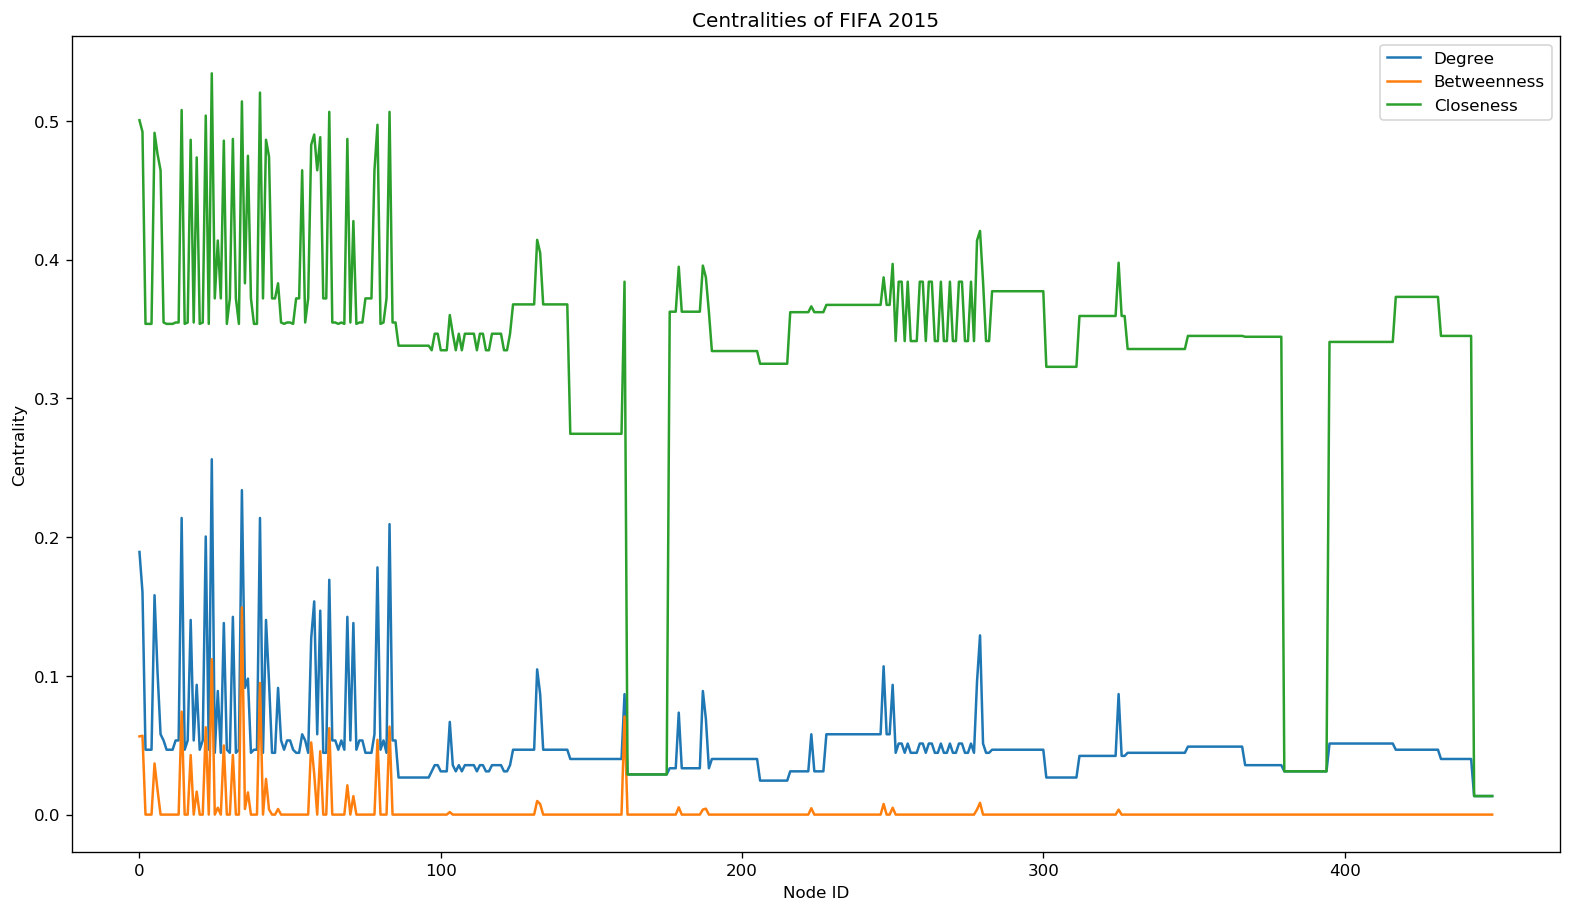

In [28]:
degree_centralities2015 = OrderedDict(nx.degree_centrality(fifa2015_graph))
betweenness_centralities2015 = OrderedDict(
    nx.betweenness_centrality(fifa2015_graph))
closeness_centralities2015 = OrderedDict(
    nx.closeness_centrality(fifa2015_graph))
plt.figure(4, figsize=(16, 9), dpi=1920 / 16)
plt.title("Centralities of FIFA 2015")
lines = plt.plot(
    range(0, nrows2015), degree_centralities2015.values(), range(0, nrows2015),
    betweenness_centralities2015.values(), range(0, nrows2015),
    closeness_centralities2015.values())
plt.xlabel("Node ID")
plt.ylabel("Centrality")
plt.legend(lines, ("Degree", "Betweenness", "Closeness"), loc="best")
plt.show()

In [29]:
central = list(
    OrderedDict(
        sorted(
            degree_centralities2015.items(), key=lambda x: x[1],
            reverse=True)).keys())
central[0:10]

['D HOOGHE Michel',
 'ERZIK Senes',
 'BEDOYA Luis',
 'GULATI Sunil',
 'VILLAR LLONA Angel Maria',
 'CHUNG David',
 'ABDULLAH Prince H.R.H',
 'TASHIMA Kohzo',
 'OMARI Constant',
 'ABO RIDA Hany']

In [30]:
central=list(OrderedDict(sorted(betweenness_centralities2015.items(),key=lambda x:x[1],reverse=True)).keys())
central[0:10]

['ERZIK Senes',
 'D HOOGHE Michel',
 'GULATI Sunil',
 'BEDOYA Luis',
 'VARELA Cristian',
 'VILLAR LLONA Angel Maria',
 'CHUNG David',
 'OMARI Constant',
 'ABO RIDA Hany',
 'ABDULLAH Prince H.R.H']

In [31]:
central = list(
    OrderedDict(
        sorted(
            closeness_centralities2015.items(),
            key=lambda x: x[1],
            reverse=True)).keys())
central[0:10]

['D HOOGHE Michel',
 'GULATI Sunil',
 'ERZIK Senes',
 'BEDOYA Luis',
 'OMARI Constant',
 'VILLAR LLONA Angel Maria',
 'CHUNG David',
 'ABDULLAH Prince H.R.H',
 'TASHIMA Kohzo',
 'ABO RIDA Hany']

### Анализа

In [90]:
names = "Blatter Joseph S", "Platini Michel"
for name in names:
    print(
        round(degree_centralities2006[name], 4),
        round(betweenness_centralities2006[name], 4),
        round(closeness_centralities2006[name], 4),
        round(clustering_coefficients2006[name], 4),
        round(hubs2006[name], 4),
        name,
        sep="\t")

0.0737	0.0	0.455	1.0	0.4953	Blatter Joseph S
0.2566	0.0958	0.5115	0.2962	0.7935	Platini Michel


In [91]:
names = "BLATTER Joseph S", "PLATINI Michel", "VAN PRAAG Michael", "GJORGJIOSKI Ilcho"
for name in names:
    print(
        round(degree_centralities2015[name], 4),
        round(betweenness_centralities2015[name], 4),
        round(closeness_centralities2015[name], 4),
        round(clustering_coefficients2015[name], 4),
        round(hubs2015[name], 4),
        name,
        sep="\t")

0.0512	0.0	0.3841	1.0	0.245	BLATTER Joseph S
0.1425	0.0211	0.487	0.4226	0.8419	PLATINI Michel
0.0445	0.0	0.3721	1.0	0.0748	VAN PRAAG Michael
0.049	0.0	0.345	1.0	0.0842	GJORGJIOSKI Ilcho


### Споредба на модели

In [70]:
small_world=nx.watts_strogatz_graph(n=nrows2015,k=20,p=0.05)
erdos_renyi=nx.erdos_renyi_graph(n=nrows2015,p=0.05)

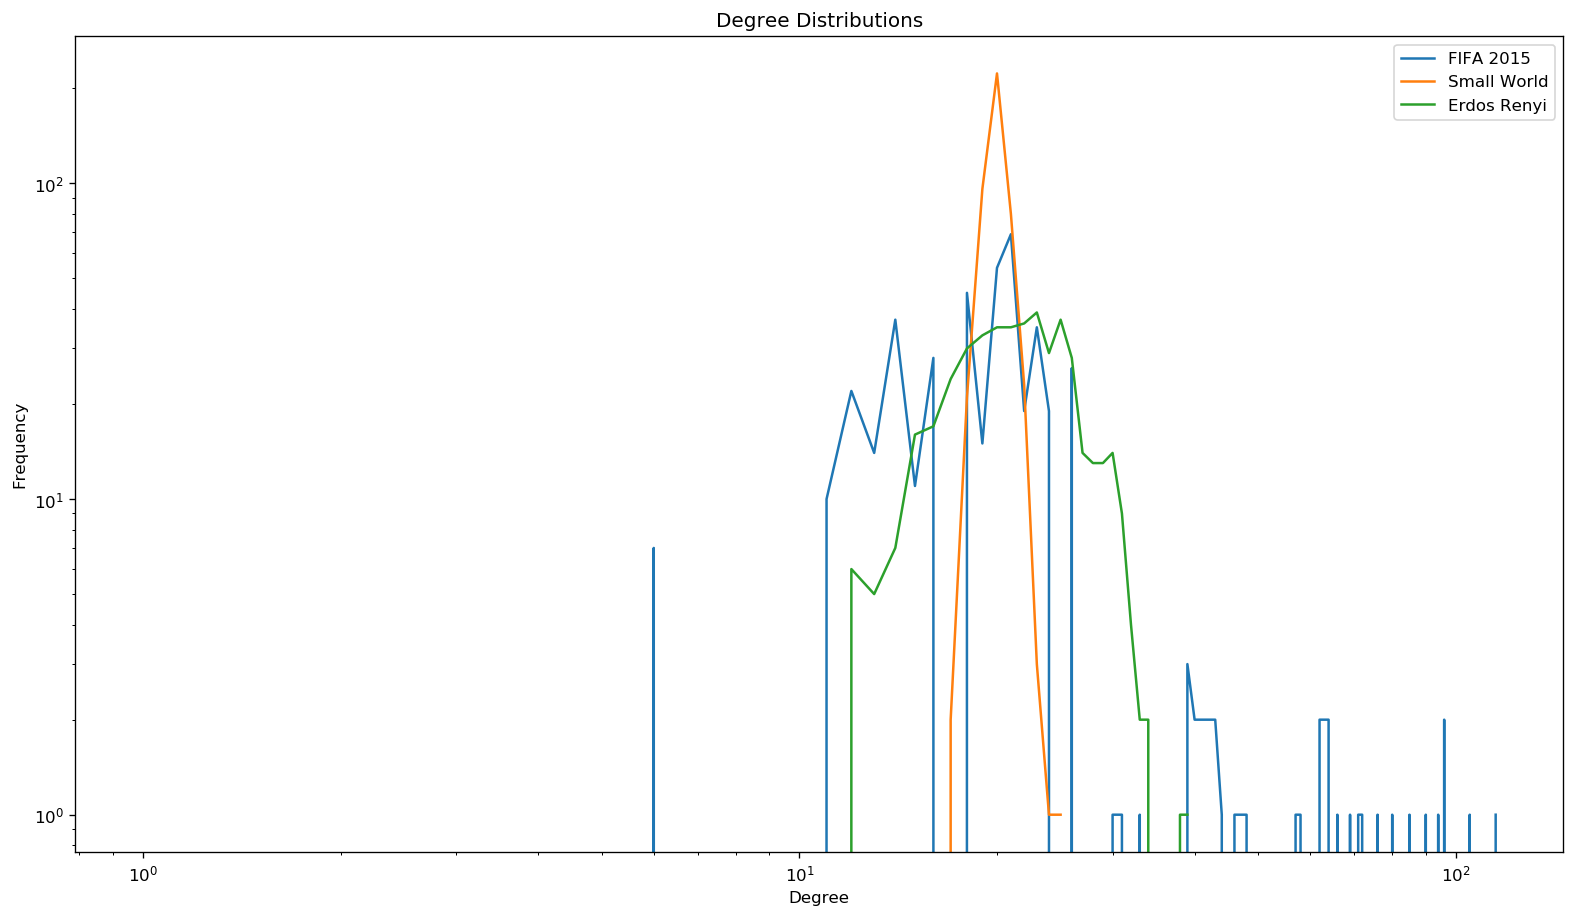

In [93]:
fifa2015_hist = nx.degree_histogram(fifa2015_graph)
small_world_hist = nx.degree_histogram(small_world)
erdos_renyi_hist = nx.degree_histogram(erdos_renyi)
plt.figure(5, figsize=(16, 9), dpi=1920 / 16)
plt.title("Degree Distributions")
lines = plt.plot(
    range(0, len(fifa2015_hist)), fifa2015_hist,
    range(0, len(small_world_hist)), small_world_hist,
    range(0, len(erdos_renyi_hist)), erdos_renyi_hist)
plt.xlabel("Degree")
plt.xscale("log")
plt.ylabel("Frequency")
plt.yscale("log")
plt.legend(lines, ("FIFA 2015", "Small World", "Erdos Renyi"), loc="best")
plt.show()

In [72]:
nx.average_clustering(fifa2015_graph)

0.948129761498617

In [73]:
nx.average_clustering(small_world)

0.6180999582623571

In [74]:
nx.average_clustering(erdos_renyi)

0.05005461394906723